In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

In [6]:
# Define Constants & Functions
# Personal Note - Define constants globally you may also try to import from a config file.

def calculate_wavelength(n_lower: int, n_upper: int) -> float:
    """
    Calculates the wavelength of a photon emitted by a Hydrogen atom 
    transitioning from n_upper to n_lower using the Rydberg formula.

    Args:
        n_lower (int): The lower energy level
        n_upper (int): The higher energy level

    Returns:
        float: Wavelength in nanometers (nm).

    """
    if n_upper <= n_lower:
        raise ValueError("n_upper must be greater than n_lower for emission")

    # The Rydberg Formula: 1/lambda = R * (1/n1^2 - 1/n2^2)
    term = (1 / n_lower**2) - (1 / n_upper**2)
    RYDBERG_CONST = 1.097373e7  # m^-1
    wavenumber = RYDBERG_CONST * term
    wavelength_m = 1 / wavenumber

    return wavelength_m * 1e9 # conversion from meters to nanometers

In [7]:
def get_series_lines(series_name: str, n_lower: int, max_upper: int = 10) -> Dict[str, float]:
    """Generates a dictionary of transitions for a given spectral series."""
    lines = {}
    for n in range(n_lower + 1, max_upper + 1):
        # Naming convention: "3->2"
        label = f"n={n}->{n_lower}"
        lines[label] = calculate_wavelength(n_lower, n)
    return lines    

In [8]:
# 2. Generate the Data

# Lymman Series - UV Range (jumps down to n=1)
lyman = get_series_lines("Lyman", n_lower=1)

# Balmer Series - Visible Range (jumps down to n=2)
balmer = get_series_lines("Balmer", n_lower=2)

# Paschen Series - IR Range (jumps down to n=3)
paschen = get_series_lines("Paschen", n_lower=3)

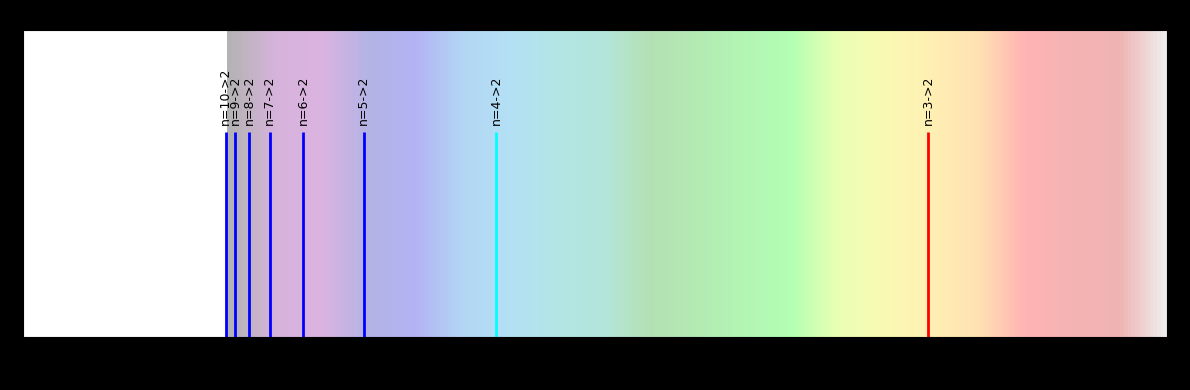

In [17]:
# 3. Visualizations
fig, ax = plt.subplots(figsize=(12,4))

# Plot the lines: we'll use different colors for different series
def plot_series(series_data, color, label, y_height):
    for name, wavelength in series_data.items():
        ax.vlines(wavelength, 0, y_height, colors=color, linestyles='-', alpha=0.7)
        # Annotate only the first few lines to avoid clutter
        if int(name.split("->")[0].split("=")[1]) <= n_lower + 3:
            ax.text(wavelength, y_height + 0.1, name, rotation=90,
                    fontsize=8, ha='center', color=color)

# Plotting the Balmer Series (visible)
n_lower = 2
for name, wl in balmer.items():
    ax.vlines(wl, 0, 1, colors='red' if wl > 600 else 'cyan' if wl > 480 else 'blue', lw=2)
    ax.text(wl, 1.05, name, rotation=90, fontsize=9, ha='center')

# Additional settings (for aesthetic purposes)
ax.set_xlim(300, 750)  # Focus on Visible/Near-UV/Near-IR
ax.set_ylim(0, 1.5)
ax.set_xlabel("Wavelength (nm)")
ax.set_title("Hydrogen Spectrum: The Balmer Series (Visible)")
ax.set_yticks([]) # Hide y-axis numbers
ax.set_facecolor('white') # Make it look like a real spectrum
fig.patch.set_facecolor('black')

# Add a "visible light" rainbow background for context
# (This is a cool trick for astrophysics plots)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', extent=[380, 750, 0, 1.5], cmap='nipy_spectral', alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# 4. Output Validation
print(f"H-alpha (3->2): {balmer['n=3->2']:.2f} nm")
print(f"H-beta  (4->2): {balmer['n=4->2']:.2f} nm")

H-alpha (3->2): 656.11 nm
H-beta  (4->2): 486.01 nm
